# Initialization

## Import & Define Functions

In [ ]:
import filter_inversion as fi
import numpy as np
import pickle
import matplotlib.pyplot as plt
import csv

import matplotlib
matplotlib.rcParams["font.size"] =  20 ; 

def voltage_time_figure_plot(X1, Y1, color_code, name):
    # Create figure
    figure1 = plt.figure(name)
    
    # Create axes
    axes1 = figure1.add_subplot(1, 1, 1)
    
    # Create plot
    axes1.plot(X1, Y1, linewidth=2, color=color_code)
    
    # Set ylabel
    axes1.set_ylabel('Voltage (mV)', fontsize=16.5)
    
    # Set xlabel
    axes1.set_xlabel('Time (s)', fontsize=16.5)
    
    # Set title
    axes1.set_title(name, fontsize=16.5)
    
    # Set x-axis limit
    # axes1.set_xlim([0, 0.000001])
    
    # Uncomment the following line to set y-axis limit
    # axes1.set_ylim([-60, 60])
    
    # Uncomment the following line to set z-axis limit
    # axes1.set_zlim([-1, 1])
    
    axes1.grid(True)
    axes1.set_axisbelow(True)
    axes1.tick_params(labelsize=15)
    
    # Show the plot
    plt.show()

def set_mean(input_array):
    return np.mean(input_array, axis=0)
def set_offset(input_array, adjust):
    return np.array(input_array[1]) - input_array[1][0] * adjust
def set_gain(input_array, adjust):
    gain = np.abs(np.max(input_array[1]) * adjust)
    return np.array(input_array[1]) / gain

def read_filter_coef_csv():
    IIR_coef = []
    with open("IIR.csv") as csvfile:
        for row in csv.reader(csvfile):
            for coef in row:
                IIR_coef.append(float(coef))
    return IIR_coef

## Load full waveform

In [42]:
X,Y =  pickle.load(open("E:/OP/Experiments/0609_predistortion/DATA/test/test/retest_500smooth_CopperLineAF_TLineCase2.pkl","rb"))

waveform = [X[0],set_mean(Y)]
waveform[0] = waveform[0]*10**(6)
waveform[1] = set_offset(np.copy(waveform),1)
waveform[1] = set_gain(np.copy(waveform), 0.985)

waveform_record = []
waveform_record.append(waveform)
%matplotlib qt
voltage_time_figure_plot(waveform[0], waveform[1], 'green', 'The original waveform')

# IIR fitting & Inverse filtering

## First Fitting & Filtering

In [43]:
"""
Select the start_time and end_time of you waveform that will be sent to the fitting process

Use the get_waveform_segment() to slice out your waveform to get the data segment
"""
start_time = 40.032
end_time = 46
waveform_segment = fi.get_waveform_segment(start_time, end_time, np.copy(waveform))
voltage_time_figure_plot(waveform_segment[0], waveform_segment[1], 'blue', 'The selected waveform segment')

In [44]:
"""
type: string
    'highpass': high-pass model fitting;
    'lowpass': low-pass model fitting;
    'line': linear model fitting;
    'skin': skin effect model fitting;
"""
type = 'lowpass'
fs = 1 / (waveform[0][1] - waveform[0][0])
time_offset = start_time
amp_offset = 0.9954
coef_B = 1
coef_tau = 1e-3
param = [type, fs, coef_B, coef_tau, time_offset, amp_offset]

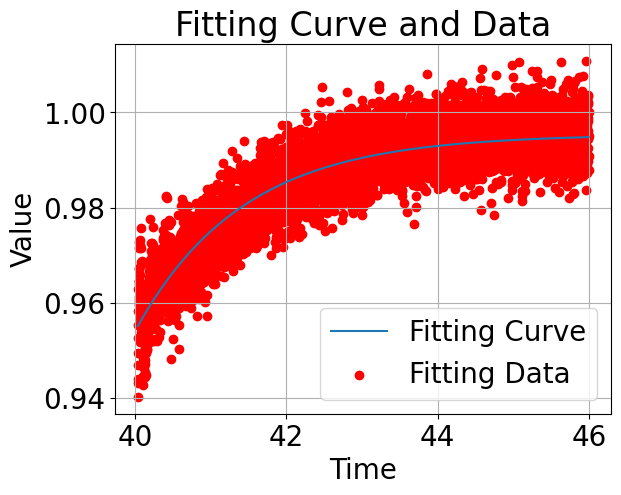

In [45]:
%matplotlib inline
waveform_pred_1st = fi.predistor(np.copy(waveform), np.copy(waveform_segment), param)
# waveform_record.append(waveform_pred_1st)

%matplotlib qt
voltage_time_figure_plot(waveform_pred_1st[0], waveform_pred_1st[1], 'green', 'Predistorted waveform')

IIR_coef = read_filter_coef_csv()
pickle.dump(IIR_coef , open("E:/OP/Experiments/0609_predistortion/DATA/test/test/IIR_data/IIR_high_1st.pkl" , "wb"))

In [46]:
# [a0, b0, a1, b1]
pickle.load(open("E:/OP/Experiments/0609_predistortion/DATA/test/test/IIR_data/IIR_high_1st.pkl", "rb"))

[1.0, 1.0470584128830493, 0.9992638174590187, -1.046318828252769]

## Second Fiting & Filtering

In [47]:
"""
Select the start_time and end_time of you waveform that will be sent to the fitting process

Use the get_waveform_segment() to slice out your waveform to get the data segment
"""
start_time = 50
end_time = 79.76
waveform_segment = fi.get_waveform_segment(start_time, end_time, np.copy(waveform_pred_1st))
voltage_time_figure_plot(waveform_segment[0], waveform_segment[1], 'blue', 'The selected waveform segment')

In [88]:
"""
type: string
    'highpass': high-pass model fitting;
    'lowpass': low-pass model fitting;
    'line': linear model fitting;
    'skin': skin effect model fitting;
"""
type = 'line'
fs = 1 / (waveform[0][1] - waveform[0][0])
time_offset = start_time
amp_offset = 1.001
coef_B = 1e-2
coef_tau = 1e-3
param = [type, fs, coef_B, coef_tau, time_offset, amp_offset]

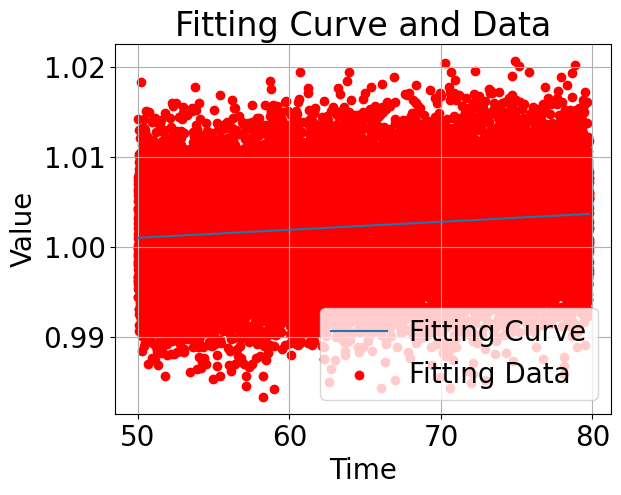

In [89]:
%matplotlib inline
waveform_pred_2nd = fi.predistor(np.copy(waveform_pred_1st), np.copy(waveform_segment), param)
# waveform_record.append(waveform_pred_1st)

%matplotlib qt
voltage_time_figure_plot(waveform_pred_2nd[0], waveform_pred_2nd[1], 'green', 'Predistorted waveform 2nd')

IIR_coef = read_filter_coef_csv()
pickle.dump(IIR_coef , open("E:/OP/Experiments/0609_predistortion/DATA/test/test/IIR_data/IIR_high_2nd.pkl" , "wb"))

In [93]:
# [a0, b0, a1, b1]
pickle.load(open("E:/OP/Experiments/0609_predistortion/DATA/test/test/IIR_data/IIR_high_2nd.pkl", "rb"))

[1.0, 0.9999999555714529, 0.9999999111429059, -0.9999999555714529]

# Collection of plot

In [51]:
# waveform_pred_1st
# waveform

%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(waveform[0], waveform_pred_2nd[1], label='Original', color=  'blue')

ax.plot(waveform[0], waveform_pred_1st[1], label='First Filtered', color = 'red')

ax.grid()
    # Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('Distorted vs. Filtered Waveform')

    # Legend
ax.legend()

    # Display the plot
plt.show()